# Unit 4 Classwork 

The goals of this assignment are to help you (1) use numerical simulation to analyze and interpret the Central Limit Theorem, (2) calculate probabilities using `R`, and (3) estimate probabilities and other quantities through numerical (computer) simulation. Such simulations can be useful. We can use simulations to help confirm that we've calculated a probability "by hand" correctly, or to estimate other quantities, like areas/integrals!


## Problem 1

**1.(a) In a matrix `x`, generate $500$ samples, each of size $n = 50$, from your favorite (non-normal) distribution.**

*Note! In any practical scenario, we would only have one sample of size $n$. The purpose here is the study the distribution of the sample mean, $\bar{x}$, over many (here, $500$) samples. This is an extremely important concept for statistical inference. The distribution of the sample mean, as well as the distribution of other estimators, over many samples will be used used heavily in the statistical inference portion of the class.*

In [3]:
set.seed(41)
m <- 500
n <- 50
p <- 0.5
x <- t(replicate(m, expr = rbinom(n, n, p)))
dim(x)
head(x)

[1] 500  50

22,32,26,21,29,31,30,25,28,27,...,22,30,33,25,21,25,25,28,26,27
31,27,22,28,20,22,23,22,19,23,...,25,28,25,20,25,23,22,31,27,26
24,30,24,21,26,24,26,25,30,24,...,19,30,23,20,24,27,28,30,26,28
31,24,25,25,21,25,23,30,27,23,...,25,28,30,25,21,28,27,25,30,23
25,22,29,21,18,24,27,22,24,27,...,25,28,21,29,28,28,23,27,26,29
27,30,25,23,25,23,27,34,25,20,...,25,24,22,31,28,21,25,25,24,21


**1.(b) Calculate the mean of each sample. This should be a vector of size $500$. Call this vector `xbar`.**

`xbar` represents the means of $500$ different samples (again: in the real world, we'd only have one of these samples; but this allows us to think about the distribution of the estimator `xbar`).


In [4]:
xbar <- rowMeans(x)
length(xbar)
head(xbar)
min(xbar)
max(xbar)

[1] 500

[1] 26.30 24.38 25.72 25.44 25.52 25.36

[1] 23.62

[1] 26.8

**1.(c) Construct a histogram of the means. Characterize the distribution of `xbar`. What is the sample mean of `xbar`? The variance of `xbar`?**

[1] 25.01848

[1] 0.2535624

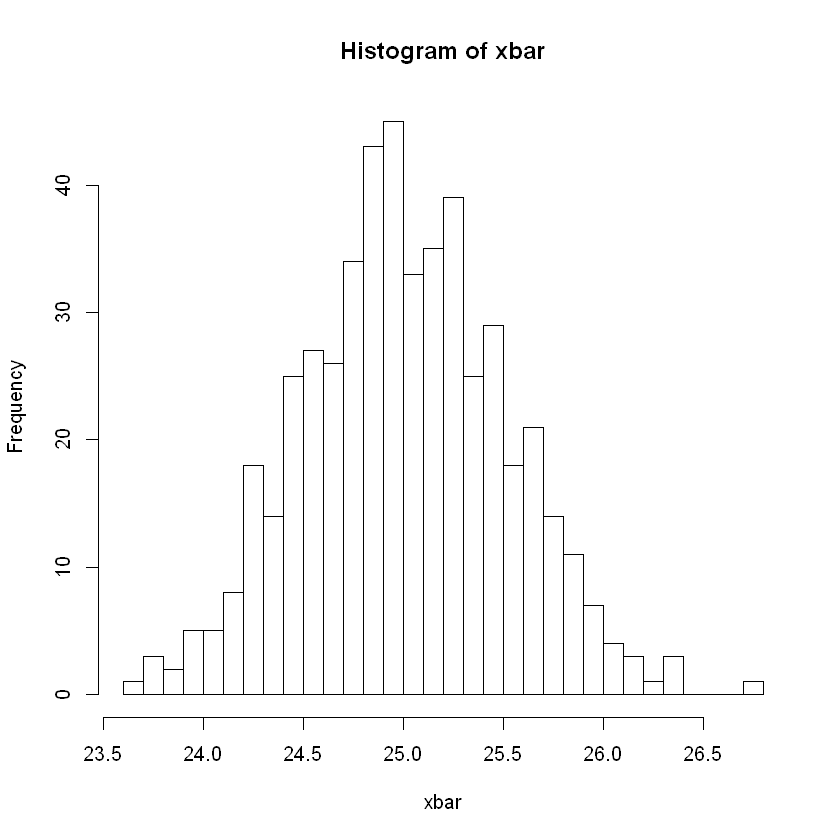

In [8]:
hist(xbar, breaks=30)
mean(xbar)
var(xbar)

**1.(d) What theoretical result from class is this a demonstration of?**

Central Limit Theorem

## Problem 2

The amount of impurity in a batch of a chemical product is a random variable with mean value $4.0 \, \text{g}$ and standard deviation $1.5 \, \text{g}$. The distribution of this random variable is unknown.

**If 50 batches are independently prepared, what is the (approximate) probability that the average amount of impurity in these $50$ batches is between $3.5 \, \text{g}$ and $3.8 \, \text{g}$?**

In [1]:
mean = 4
std_dev = 1.5
n = 50

error = std_dev / sqrt(n)

z_3.5 = (3.5 - mean) / error
z_3.8 = (3.8 - mean) / error

p = pnorm(z_3.8) - pnorm(z_3.5)

p

[1] 0.1636782

## Problem 3

Suppose that we are going to collect data containing information for $480$ purchases at Monk's Cafe. Further, suppose we know two out of every three purchases at Monk's Cafe are paid for by credit cards.

**3.(a) What is the probability that greater than $300$ (of the $480$) purchases will be made by credit card? Use a binomially distributed random variable here.**

In [2]:
n = 480
p_cc = 2/3
k = 301

p = 1 - pbinom(k - 1, size = n, prob = p_cc)
p

[1] 0.9696372

**3.(b) Now, consider $X \sim N\left(\mu=np, \sigma= \sqrt{np(1 - p)}\right)$, for appropriate values of $n$ and $p$. Find the probability that $X$ is greater than $300$. Compare this to the answer in part 2.(a).**

In [3]:
mean = n * p_cc
std = sqrt(n*p_cc * (1 - p_cc))
x = 300

z = (x - mean) / std

p_norm = 1 - pnorm(z)

p_norm

[1] 0.9735962

The answer is around 97.35 percent, which is higher than the 96.96 percent value from the previous section.

**3.(c) Plot the PMF of the binomial random variable used in 3.(a) and the PDF of $X$ from part 3.(b). Comment on the plots.**


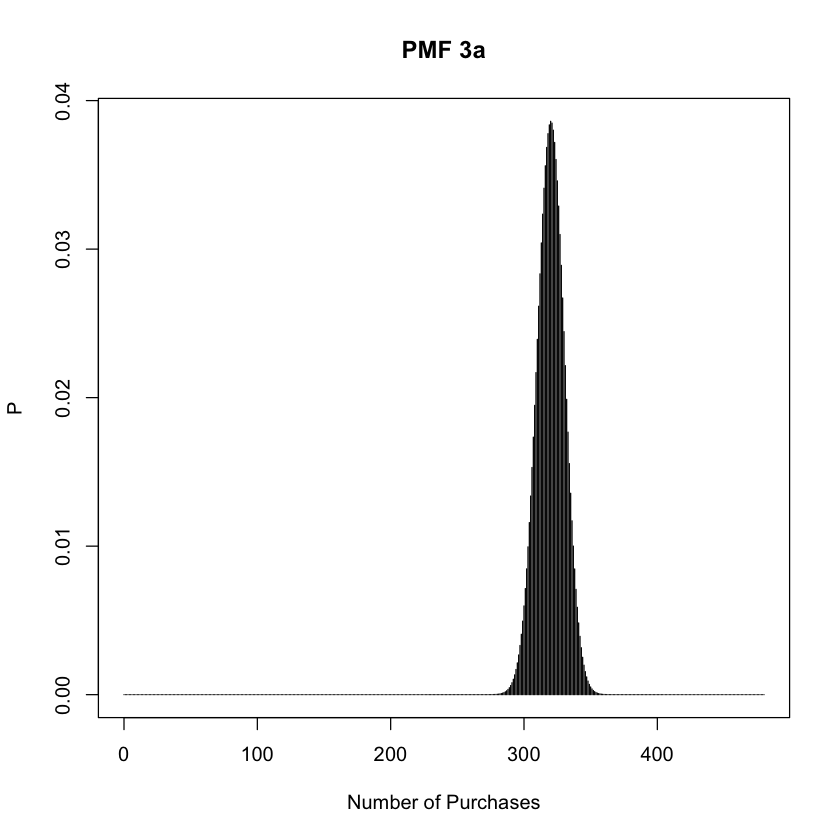

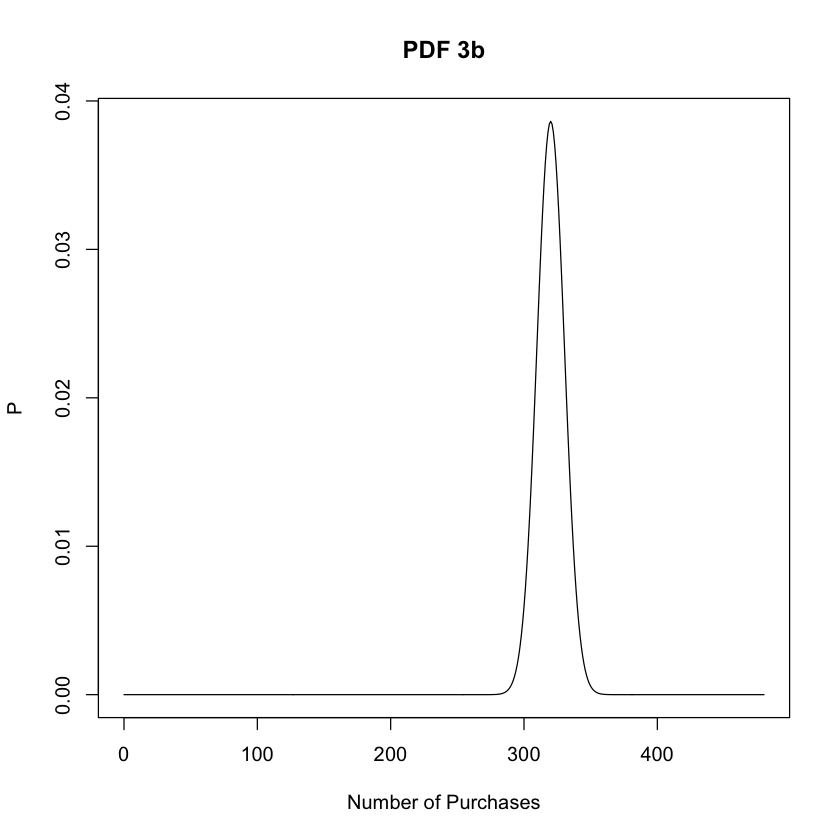

In [5]:
pmf_3a = dbinom(0:n, size = n, prob = p_cc)
pdf_3b = dnorm(0:n, mean = mean, sd = std)

# Plotting PMF
plot(0:n, pmf_3a, type = "h", xlab = "Number of Purchases", ylab = "P", main = "PMF 3a")
plot(0:n, pdf_3b, type = "l", xlab = "Number of Purchases", ylab = "P", main = "PDF 3b")

Through visual comparasion, I found that the two plots to have a similar distribution. The mean and standard deviation are also similar between the two plots. 

**3.(d) Find the probability that between $300$ and $320$ people will pay for their purchases using a credit card. Use both the binomial distribution and the normal approximation given above.**

In [7]:
k1_bi = 300
k2_bi = 320

p_bi = sum(dbinom(k1_bi:k2_bi, size = n, prob = p_cc))

p_bi

z1 = (k1_bi - mean) / std
z2 = (k2_bi - mean) / std

p_norm = pnorm(z2) - pnorm(z1)

p_norm

[1] 0.4927723

[1] 0.4735962

The binomial distribution gives a probability of 49.3% while the normal approximation gives a probability of 47.4%